# Analyzing Data Analyst vacancies around the world

Weblink: https://www.kaggle.com/andrewmvd/data-analyst-jobs \
2000+ listing scraped from glassdoor

Question to investigate:
1. What is the distribution of salary?
2. What is the distribution of vacancies and pay of DA roles around the world?
3. Which industry/sector has the highest paying roles?
4. Which industry/sector is hiring the most DA?
5. Are larger companies (in terms of revenue and no. of employees) paying more for DA talents?
6. Do higher rating companies paying higher for DA talents?
7. What keywords are most common in a role and description? What can we uncover from this? Are we able to classify roles into seniority or domain experience?
8. How much more are senior/experienced hire getting paid compared to junior hires? Does this significance differ from industry/sector to industry/sector?
9. What is the distribution of salarys & vacancies in a private vs public held company? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = (pd.read_csv('DataAnalyst.csv'))
df = df.drop(df.columns[0],axis=1)

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
print('number of labels:',len(list(df.columns)))
print(list(df.columns))

number of labels: 15
['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply']


In [5]:
int(df['Salary Estimate'][0].split('-')[0].replace('$','').replace('K',''))
int(df['Salary Estimate'][0].split('-')[1].split(' ')[0].replace('$','').replace('K',''))

66

In [6]:
for index, row in enumerate(df.values):
    try:
        df.loc[index,'Lower Salary Estimate'] = int(df['Salary Estimate'][index].split('-')[0].replace('$','').replace('K',''))
        df.loc[index,'Upper Salary Estimate'] = int(df['Salary Estimate'][index].split('-')[1].split(' ')[0].replace('$','').replace('K',''))
        df.loc[index,'Mean Salary Estimate'] = (df.loc[index,'Lower Salary Estimate'] + df.loc[index,'Upper Salary Estimate'])/2
    
    except:
        df.loc[index,'Lower Salary Estimate'] = math.nan
        df.loc[index,'Upper Salary Estimate'] = math.nan
        df.loc[index,'Mean Salary Estimate'] = math.nan

In [7]:
for index, row in enumerate(df.values):
    try:
        df.loc[index,'Location Only State'] = df['Location'][index].split(',')[len(df['Location'][index].split(','))-1]
    except:
        df.loc[index,'Location Only State'] = math.nan

## What is the distribution of salary?

,Lower Salary Estimate,Upper Salary Estimate,Mean Salary Estimate
count,2252.000000,2252.000000,2252.000000
mean,54.266874,89.979130,72.123002
std,19.575375,29.315605,23.600734
min,24.000000,38.000000,33.500000
25%,41.000000,70.000000,58.000000
50%,50.000000,87.000000,69.000000
75%,64.000000,104.000000,80.500000
max,113.000000,190.000000,150.000000


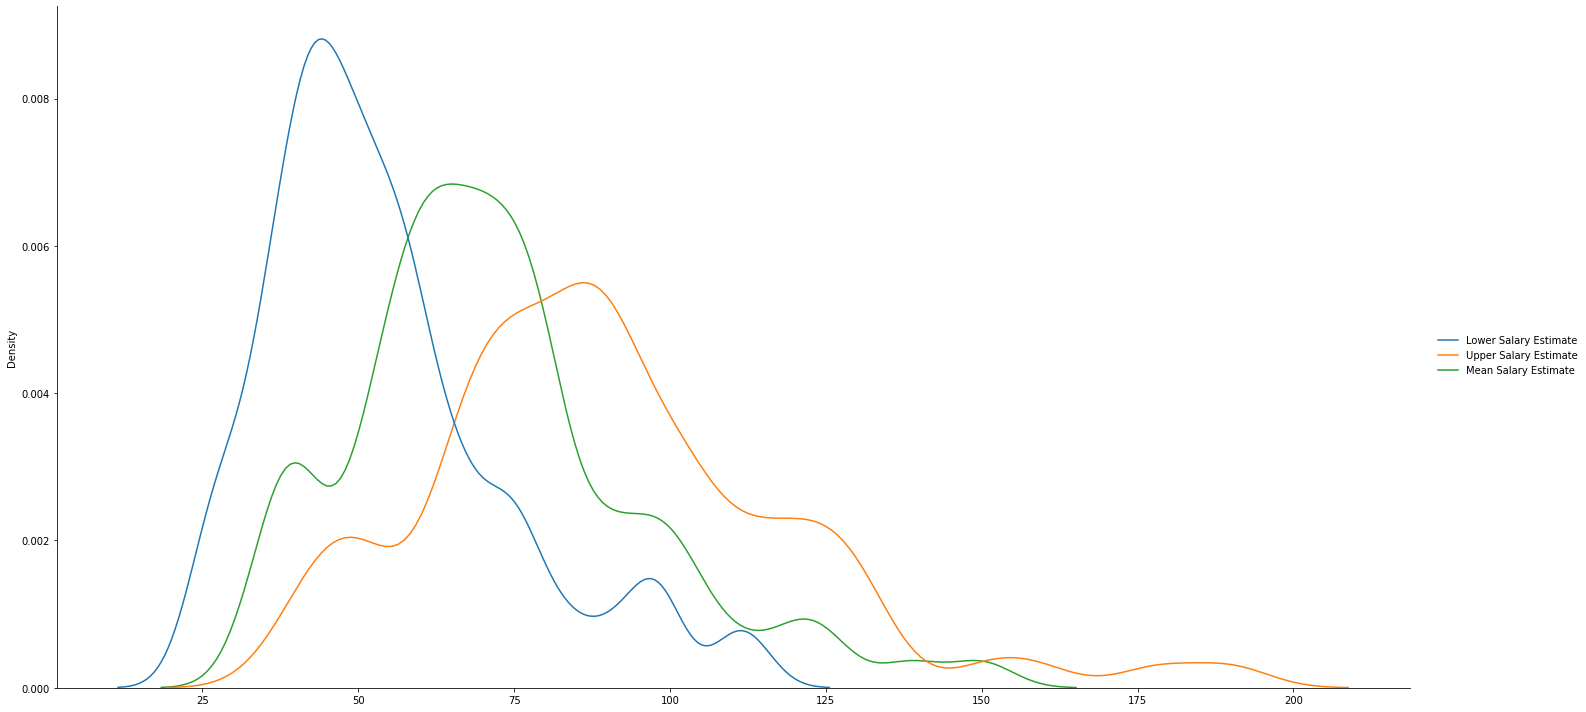

In [8]:
sns.displot(data=df[['Lower Salary Estimate','Upper Salary Estimate','Mean Salary Estimate']],kind='kde',height=10,aspect=2)
df[['Lower Salary Estimate','Upper Salary Estimate','Mean Salary Estimate']].describe()

Observations
1. Mean and median of both upper and lower salary are approximately similar, suggesting that there are not a lot of outliers affecting the mean.
2. Standard deviation of Upper Salary Estimation is larger than Lower Salary Estimation.
3. Mean Salary Estimate is $69K, which is almost twice the average salary of an office worker in United States

## What is the distribution of vacancies and pay of DA roles around the world?

In [9]:
df_location= df[['Location Only State','Lower Salary Estimate','Upper Salary Estimate','Mean Salary Estimate']].groupby(['Location Only State']).mean().reset_index()
df_count = df[['Location Only State','Mean Salary Estimate']].groupby(['Location Only State']).count().reset_index()
df_location['Count'] = df_count['Mean Salary Estimate']
df_location.sort_values('Mean Salary Estimate',ascending=False)

,Location Only State,Lower Salary Estimate,Upper Salary Estimate,Mean Salary Estimate,Count
1,CA,66.311502,110.552716,88.432109,626
6,IL,67.792683,88.829268,78.310976,164
2,CO,57.947917,89.062500,73.505208,96
10,NJ,55.767442,90.232558,73.000000,86
11,NY,53.797101,89.026087,71.411594,345
0,AZ,47.082474,94.494845,70.788660,97
14,SC,53.666667,83.000000,68.333333,3
9,NC,50.988889,85.233333,68.111111,90
17,VA,45.250000,85.125000,65.187500,48
18,WA,45.188679,84.320755,64.754717,53


We can see that on average, the best paying DS roles are in CA, which is also the state with the most number of DS roles - almost twice as many as the next State.

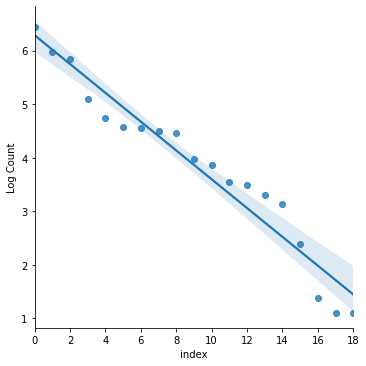

In [10]:
df_lmplot = df_location[['Location Only State','Count']].sort_values('Count',ascending=False).reset_index().drop(['index'],axis=1).reset_index()
df_lmplot['Log Count'] = np.log(df_lmplot['Count'])
sns.lmplot(x='index',y='Log Count',data=df_lmplot)

Distribution of jobs across State follows a power law. Log transform it gives us a regression line.

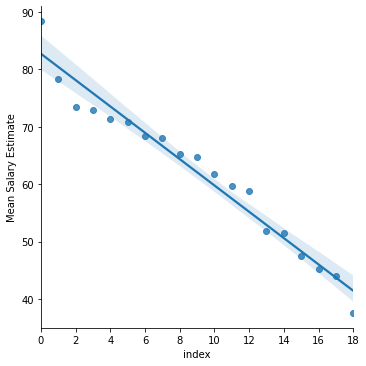

In [11]:
df_lmplot = df[['Location Only State','Mean Salary Estimate']].groupby(['Location Only State']).mean().reset_index().sort_values('Mean Salary Estimate',ascending=False).reset_index().drop('index',axis=1).reset_index()
sns.lmplot(x='index',y='Mean Salary Estimate',data=df_lmplot)

Mean Salary Estimate across States is quite linear.

## Which industry/sector has the highest paying roles?

In [12]:
df[['Industry','Lower Salary Estimate','Upper Salary Estimate','Mean Salary Estimate']].groupby(['Industry']).mean().reset_index().sort_values('Mean Salary Estimate',ascending=False).head()

,Industry,Lower Salary Estimate,Upper Salary Estimate,Mean Salary Estimate
26,Drug & Health Stores,82.500000,108.000000,95.250000
27,Education Training Services,69.666667,116.000000,92.833333
42,Health Care Products Manufacturing,69.200000,110.400000,89.800000
74,Sports & Recreation,69.000000,107.333333,88.166667
37,Gambling,64.000000,112.000000,88.000000


In [13]:
df[['Industry','Lower Salary Estimate','Upper Salary Estimate','Mean Salary Estimate']].groupby(['Industry']).mean().reset_index().sort_values('Mean Salary Estimate',ascending=False).tail()

,Industry,Lower Salary Estimate,Upper Salary Estimate,Mean Salary Estimate
13,Casual Restaurants,36.200000,60.400000,48.300
64,Oil & Gas Services,36.250000,56.500000,46.375
41,Grocery Stores & Supermarkets,28.333333,54.666667,41.500
83,Trucking,35.000000,42.000000,38.500
5,Audiovisual,24.000000,48.000000,36.000


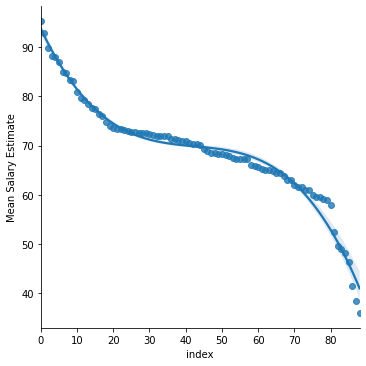

In [14]:
df_lmplot = df[['Industry','Lower Salary Estimate','Upper Salary Estimate','Mean Salary Estimate']].groupby(['Industry']).mean().reset_index().sort_values('Mean Salary Estimate',ascending=False).reset_index().drop('index',axis=1).reset_index()
sns.lmplot(x='index',y='Mean Salary Estimate',data=df_lmplot,order=3)

Distribution of salary across industry follows closely a polynomial distribution.

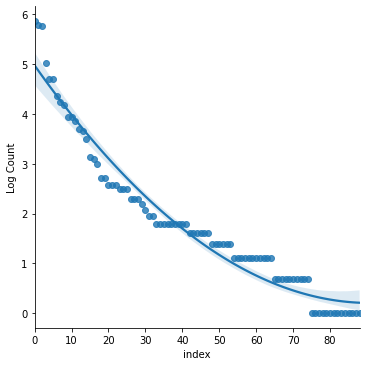

In [15]:
df_lmplot = df[['Industry','Mean Salary Estimate']].groupby(['Industry']).count().reset_index().sort_values('Mean Salary Estimate',ascending=False).reset_index().drop('index',axis=1).reset_index()
df_lmplot['Log Count'] = np.log(df_lmplot['Mean Salary Estimate'])
sns.lmplot(x='index',y='Log Count',data=df_lmplot,order=2)

## Which industry/sector is hiring the most DA?

In [16]:
df_industry= df[['Industry','Mean Salary Estimate']].groupby(['Industry']).count().reset_index().sort_values('Mean Salary Estimate',ascending=False)[0:6]
df_industry.rename(columns={'Mean Salary Estimate':'Count of Roles'})
df_industry.loc[0,'Industry'] = 'Misc'
df_industry.reset_index().drop(['index'],axis=1)

,Industry,Mean Salary Estimate
0,Misc,353
1,IT Services,325
2,Staffing & Outsourcing,322
3,Health Care Services & Hospitals,151
4,Consulting,111
5,Computer Hardware & Software,111


## Are larger companies (in terms of revenue and no. of employees) paying more for DA talents?

In [17]:
for index, row in enumerate(df.values):
    try:
        df.loc[index,'Size Lower'] = int(df['Size'][index].split(' ')[0].replace('+',''))
        df.loc[index,'Size Upper'] = int(df['Size'][index].split(' ')[len(df['Size'][index].split(' '))-2].replace('+',''))
        if df.loc[index,'Size Lower'] == -1:
            df.loc[index,'Size Lower'] = math.nan
        if df.loc[index,'Size Upper'] == -1:
            df.loc[index,'Size Upper'] = math.nan
    except:
        df.loc[index,'Lower Salary Estimate'] = math.nan
        df.loc[index,'Upper Salary Estimate'] = math.nan
        df.loc[index,'Mean Salary Estimate'] = math.nan

In [18]:
df[['Size Lower','Lower Salary Estimate','Upper Salary Estimate', 'Mean Salary Estimate']].groupby(['Size Lower']).mean().sort_values('Mean Salary Estimate',ascending=False).reset_index()

,Size Lower,Lower Salary Estimate,Upper Salary Estimate,Mean Salary Estimate
0,5001.0,55.505155,92.896907,74.201031
1,1001.0,54.928161,90.810345,72.869253
2,1.0,54.858790,90.564841,72.711816
3,51.0,54.340476,90.702381,72.521429
4,501.0,54.526066,89.450237,71.988152
5,201.0,53.602410,88.783133,71.192771
6,10000.0,52.141333,87.773333,69.957333


In [19]:
df[['Size Upper','Lower Salary Estimate','Upper Salary Estimate', 'Mean Salary Estimate']].groupby(['Size Upper']).mean().sort_values('Mean Salary Estimate',ascending=False).reset_index()

,Size Upper,Lower Salary Estimate,Upper Salary Estimate,Mean Salary Estimate
0,5000.0,54.928161,90.810345,72.869253
1,50.0,54.858790,90.564841,72.711816
2,200.0,54.340476,90.702381,72.521429
3,1000.0,54.526066,89.450237,71.988152
4,500.0,53.602410,88.783133,71.192771
5,10000.0,52.832627,88.826271,70.829449


There is not very high variations in compensation amongst the different size of companies. Mid size companies of around 5000 employees has the highest salary offers. Largest companies of 10,000 employees or more offers the lowest salary. This could be due to the fact that they are able to attract potential employees through employer branding.

## Do higher rating companies paying higher for DA talents?

<AxesSubplot:xlabel='Rating', ylabel='Mean Salary Estimate'>

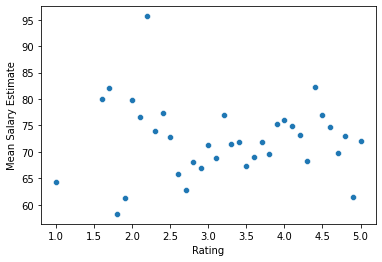

In [20]:
df_scatter = df[['Rating','Lower Salary Estimate','Upper Salary Estimate', 'Mean Salary Estimate']].groupby(['Rating']).mean().sort_values('Rating',ascending=False).reset_index().drop([36])
sns.scatterplot(data=df_scatter, x='Rating', y='Mean Salary Estimate')

In [21]:
print('Correlation between Rating and Mean Salary Estimate is:',df[['Rating','Mean Salary Estimate']].corr().reset_index().loc[0,'Mean Salary Estimate'])

Correlation between Rating and Mean Salary Estimate is: 0.002122887531362734


There seem to be no statistically significant for correlation between Rating and Mean Salary Estimates.

## What keywords are most common in a role and description? What can we uncover from this? Are we able to classify roles into seniority or domain experience?

In [22]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,Easy Apply,Lower Salary Estimate,Upper Salary Estimate,Mean Salary Estimate,Location Only State,Size Lower,Size Upper
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66.0,51.5,NY,201.0,500.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,...,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66.0,51.5,NY,10000.0,10000.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,...,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37.0,66.0,51.5,NY,1001.0,5000.0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,...,Information Technology,$50 to $100 million (USD),-1,-1,37.0,66.0,51.5,NY,201.0,500.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,...,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,51.5,NY,501.0,1000.0


In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/allenng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import stem_text
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

df['Job Title Tokenized Lemmatized'] = df['Job Title Tokenized Lemmatized'].astype('object')

for index, row in enumerate(df.values):
    text_array = stem_text(remove_stopwords(df['Job Title'][index])).replace(',','').split(' ')
    text_array = list(map(lambda text: wnl.lemmatize(text),text_array))
    df.at[index,'Job Title Tokenized Lemmatized'] = text_array

In [29]:
from gensim.corpora import Dictionary

dictionary = Dictionary(df['Job Title Tokenized Lemmatized'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

corpus_dict = dictionary.token2id
token_list = list(corpus_dict.keys())
id_list = list(corpus_dict.values())

freq_dict = dictionary.cfs
freq_dict = sorted(freq_dict.items(),key=lambda item: item[1],reverse=True)

print(f'total number of open positions: {len(df)}')
count = 0
for keys in freq_dict:
    count+=1
    print(f'{token_list[id_list.index(keys[0])]} : {keys[1]}')
    if count == 30:
        break

total number of open positions: 2253
- : 320
senior : 279
busi : 163
sr. : 91
& : 79
manag : 71
/ : 70
junior : 58
analyt : 57
lead : 56
report : 54
qualiti : 50
system : 48
healthcar : 48
financi : 48
market : 47
govern : 45
ii : 44
oper : 40
secur : 40
sr : 38
iii : 35
product : 32
scienc : 29
warehous : 29
technic : 28
intellig : 26
servic : 26
i : 26
bi : 26


We can see around 10% of the roles are considered senior roles. 3% of the roles are management.

In [35]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import stem_text
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

df['Job Description Tokenized Lemmatized'] = df['Job Description Tokenized Lemmatized'].astype('object')

for index, row in enumerate(df.values):
    text_array = stem_text(remove_stopwords(df['Job Description'][index])).replace(',','').split(' ')
    text_array = list(map(lambda text: wnl.lemmatize(text),text_array))
    df.at[index,'Job Description Tokenized Lemmatized'] = text_array

In [38]:
dictionary = Dictionary(df['Job Description Tokenized Lemmatized'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

corpus_dict = dictionary.token2id
token_list = list(corpus_dict.keys())
id_list = list(corpus_dict.values())

freq_dict = dictionary.cfs
freq_dict = sorted(freq_dict.items(),key=lambda item: item[1],reverse=True)

print(f'total number of open positions: {len(df)}')
count = 0
for keys in freq_dict:
    count+=1
    print(f'{token_list[id_list.index(keys[0])]} : {keys[1]}')
    if count == 100:
        break

total number of open positions: 2253
• : 2862
inform : 2426
applic : 2298
we : 2286
product : 2186
tool : 2098
system : 2074
new : 1998
qualiti : 1988
technic : 1896
- : 1807
need : 1794
design : 1755
program : 1743
client : 1725
custom : 1699
posit : 1646
servic : 1641
analyz : 1640
creat : 1629
oper : 1621
improv : 1609
u : 1599
solut : 1563
build : 1549
technolog : 1538
databas : 1513
help : 1490
ensur : 1486
statist : 1483
implement : 1474
compani : 1471
thi : 1437
complex : 1428
employ : 1421
maintain : 1415
& : 1401
role : 1386
health : 1381
identifi : 1377
model : 1376
research : 1301
document : 1287
time : 1275
insight : 1261
financi : 1252
intern : 1229
assist : 1205
and/or : 1155
function : 1139
effect : 1127
test : 1123
collabor : 1114
partner : 1100
a : 1095
kei : 1092
problem : 1086
level : 1080
prefer : 1079
lead : 1073
advanc : 1071
you : 1070
market : 1045
plan : 1043
environ : 1013
multipl : 1012
candid : 999
drive : 995
equal : 974
present : 973
integr : 967
softwar :

Top keywords that is brought to my attention:
1. client
2. health
3. finance
4. research

What I can derive from this top keywords is that most DS/DA roles are client facing. They belong mainly in the healthcare and finance, research sectors/functions. 

In [72]:
df['Job Title Tokenized Lemmatized'][0]

['data', 'analyst', 'center', 'immigr', 'justic', '(cij)']

In [106]:
df_exp = pd.DataFrame()
for index, row in enumerate(df.values):
    for array in df['Job Title Tokenized Lemmatized'][index]:
        if array == 'senior' or array == 'junior' or array == 'manag':
            df_exp.loc[index,'seniority'] = array
            df_exp.loc[index,'Lower Salary Estimate'] = df['Lower Salary Estimate'][index]
            df_exp.loc[index,'Upper Salary Estimate'] = df['Upper Salary Estimate'][index]
            df_exp.loc[index,'Mean Salary Estimate'] = df['Mean Salary Estimate'][index]
            break

           Lower Salary Estimate  Upper Salary Estimate  Mean Salary Estimate
seniority                                                                    
junior                 46.793103              79.724138             63.258621
manag                  56.557377              94.000000             75.278689
senior                 54.605839              91.978102             73.291971
Number of senior roles: 278, Number of junior roles 58


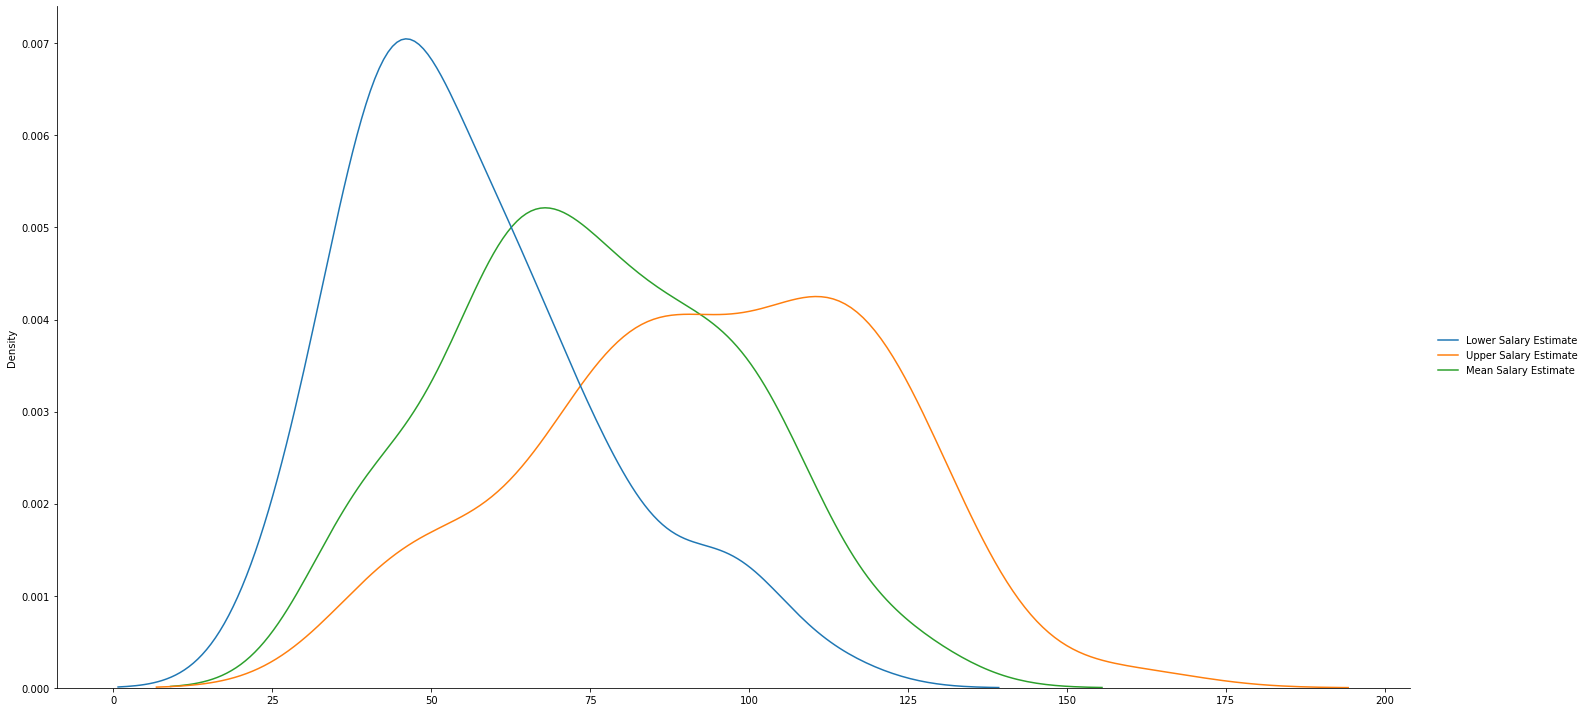

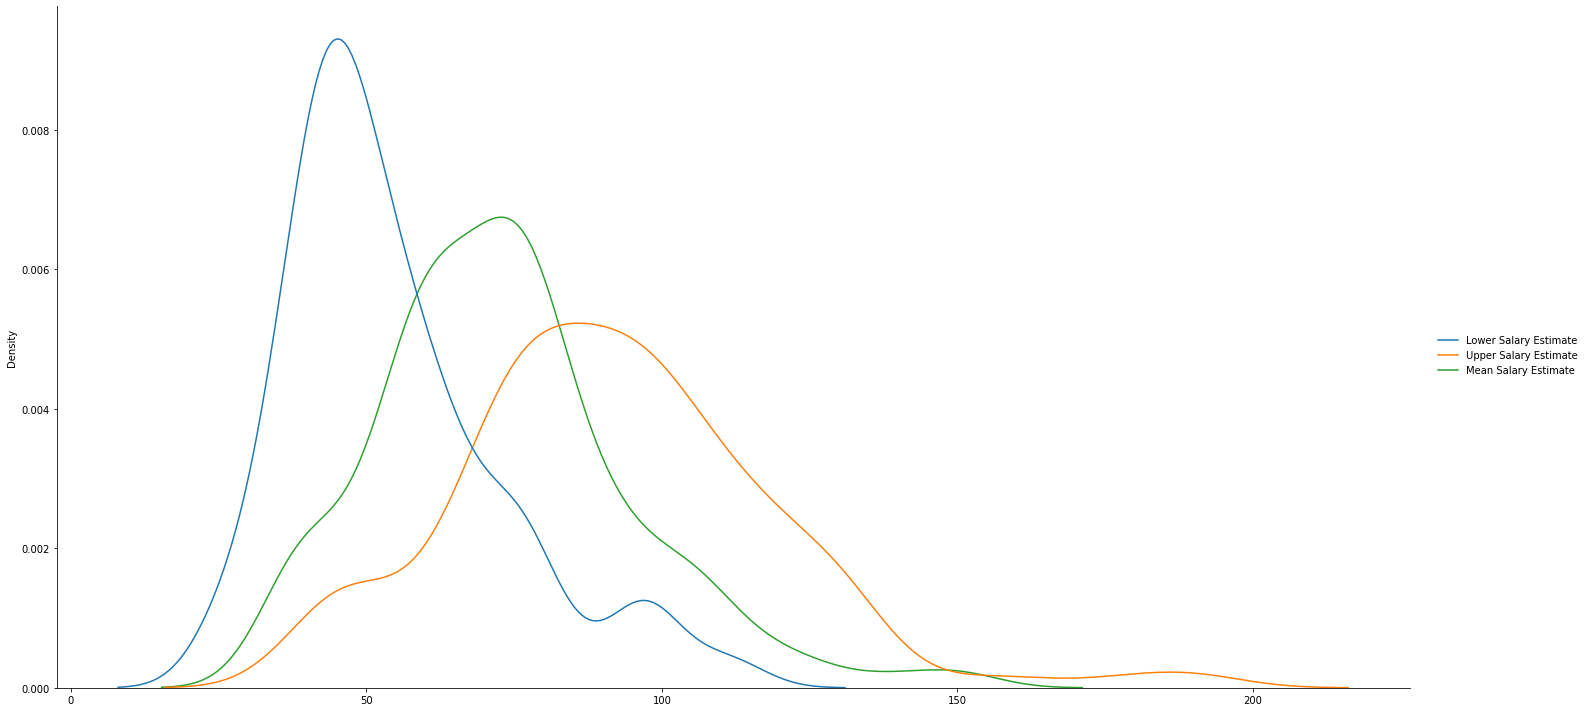

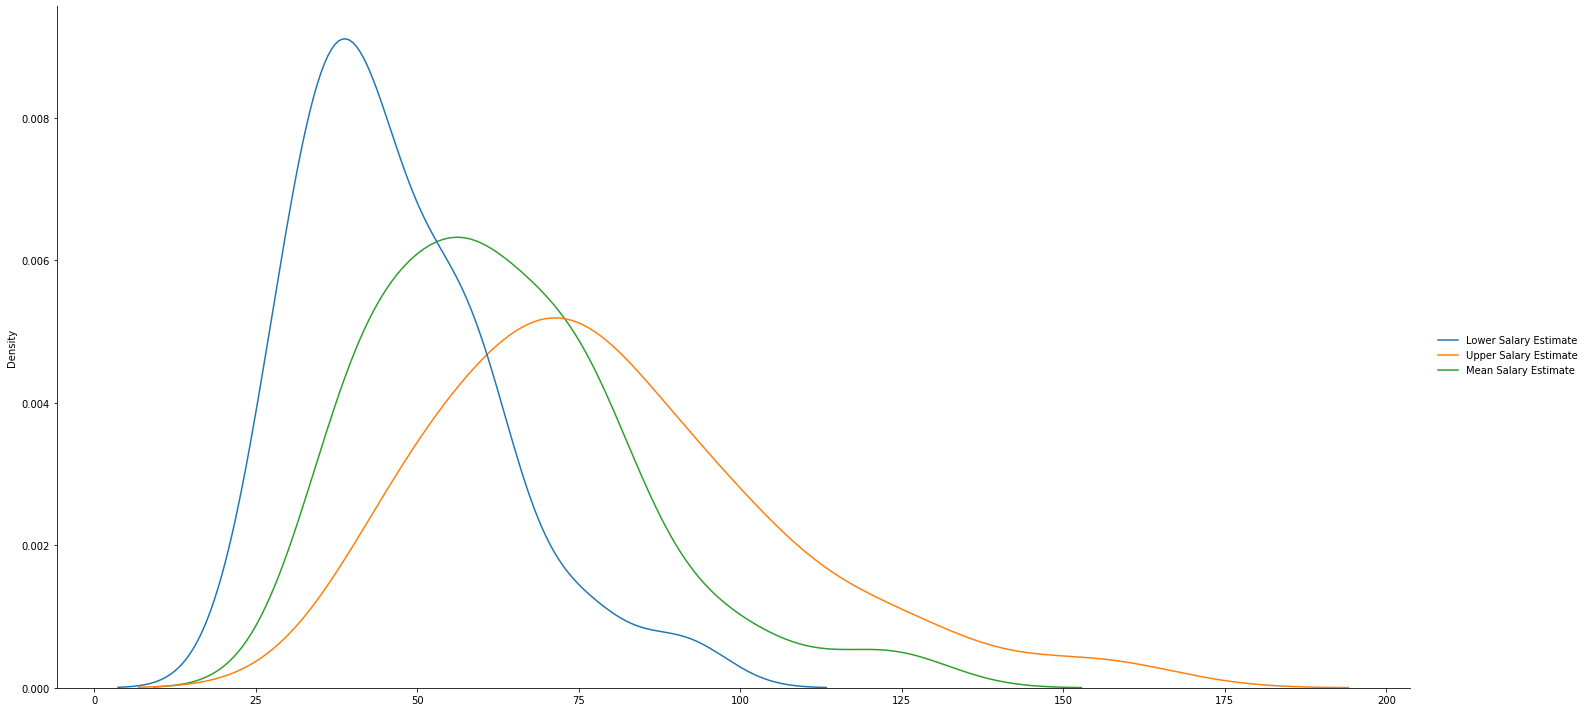

In [109]:
print(df_exp.groupby(['seniority']).mean())
df_manag = df_exp.loc[(df_exp.seniority == 'manag')]
df_senior = df_exp.loc[(df_exp.seniority == 'senior')]
df_junior = df_exp.loc[(df_exp.seniority == 'junior')]
print(f'Number of senior roles: {len(df_senior)}, Number of junior roles {len(df_junior)}')
sns.displot(data=df_manag,kind='kde',height=10,aspect=2)
sns.displot(data=df_senior,kind='kde',height=10,aspect=2)
sns.displot(data=df_junior,kind='kde',height=10,aspect=2)


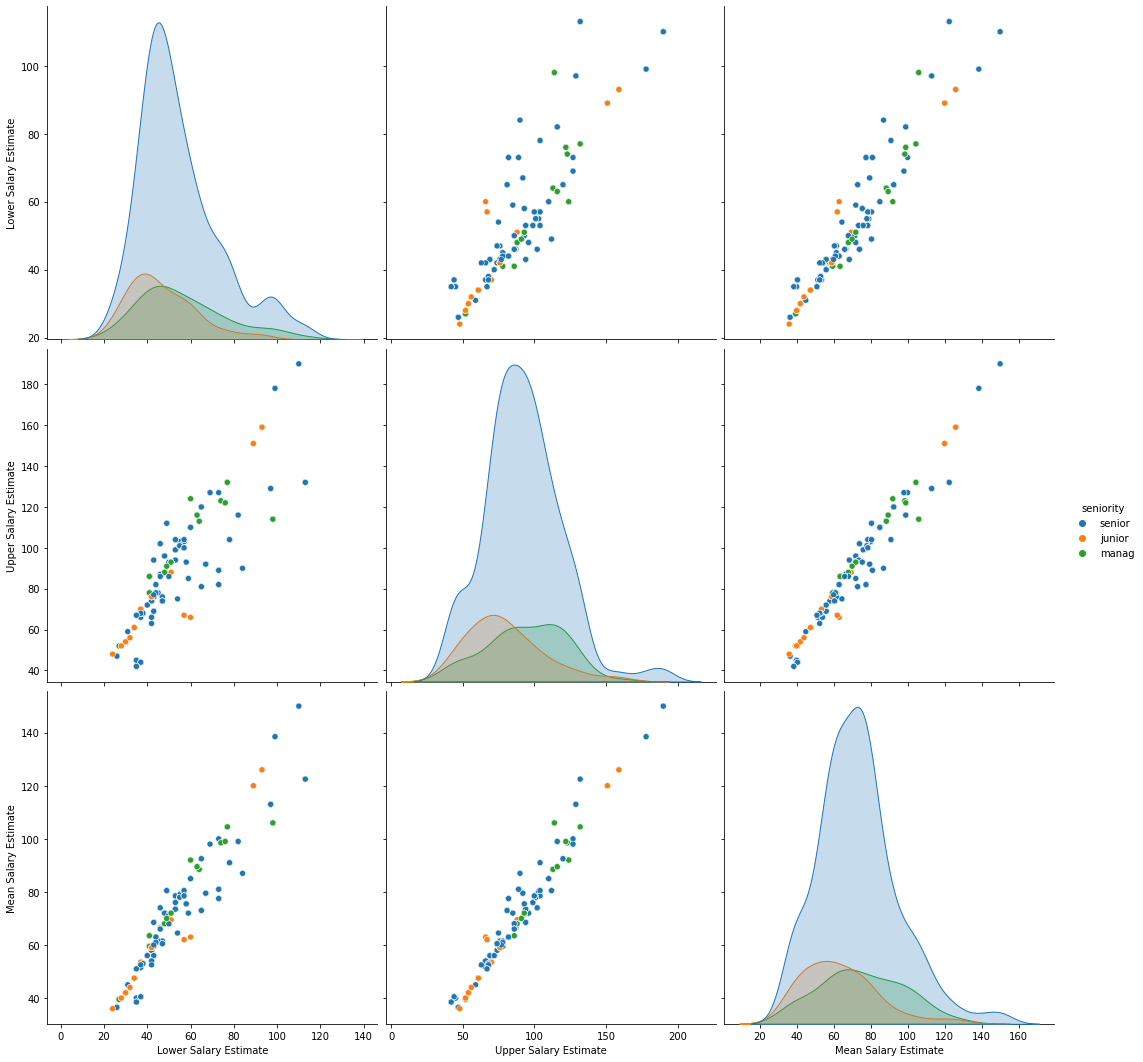

In [108]:
sns.pairplot(df_exp, hue="seniority", height=5)

Senior positions are on average paid 10K more than junior roles. Only about 10% of the roles explicitly states for seniority. Most roles probably have room for candidates with different experience levels to apply. 

It is interesting to note that junior roles are also getting paid around 10K less than the mean of the entire available listing dataset, while the previous observation was that most roles probably have room for candidates with different experience levels to apply. I would then advise fresh graduates or people with junior experience to avoid applying for roles with 'junior' in the listing name go for roles that are more generic in nature.

Managerial roles are getting only on average 2K higher than senior roles. Hence, I would caution people in senior roles to not apply for managerial roles just for the renumeration alone, but rather if they have the aspiration for it.

## What is the distribution of salarys & vacancies in a private vs public held company?

In [121]:
df[['Type of ownership','Lower Salary Estimate','Upper Salary Estimate', 'Mean Salary Estimate']].groupby(['Type of ownership']).count().apply(lambda x: x*100/x.sum())

,Lower Salary Estimate,Upper Salary Estimate,Mean Salary Estimate
Type of ownership,,,
-1,7.375566,7.375566,7.375566
College / University,1.447964,1.447964,1.447964
Company - Private,56.515837,56.515837,56.515837
Company - Public,19.954751,19.954751,19.954751
Contract,0.497738,0.497738,0.497738
Franchise,0.090498,0.090498,0.090498
Government,1.674208,1.674208,1.674208
Hospital,0.859729,0.859729,0.859729
Nonprofit Organization,5.610860,5.610860,5.610860


In [130]:
count_df = df[['Type of ownership','Lower Salary Estimate','Upper Salary Estimate', 'Mean Salary Estimate']].groupby(['Type of ownership']).count().reset_index()['Lower Salary Estimate']
num_govt = count_df[6]
num_public = count_df[3]
num_private = count_df[2]
print(f'Number of roles from Private company: {num_private}, Public company: {num_public}, Govt: {num_govt}')

Number of roles from Private company: 1249, Public company: 441, Govt: 37


In [148]:
df_gpp = df[['Type of ownership','Lower Salary Estimate','Upper Salary Estimate', 'Mean Salary Estimate']]
df_gpp = df_gpp.loc[(df['Type of ownership'].isin(['Government','Company - Private','Company - Public']))]
df_govt = df_gpp.loc[(df['Type of ownership'] == 'Government')]
df_public = df_gpp.loc[(df['Type of ownership'] == 'Company - Public')]
df_private = df_gpp.loc[(df['Type of ownership'] == 'Company - Private')]

                   Lower Salary Estimate  Upper Salary Estimate  \
Type of ownership                                                 
Company - Private              54.405925              90.529223   
Company - Public               54.349206              91.179138   
Government                     45.189189              75.486486   

                   Mean Salary Estimate  
Type of ownership                        
Company - Private             72.467574  
Company - Public              72.764172  
Government                    60.337838  


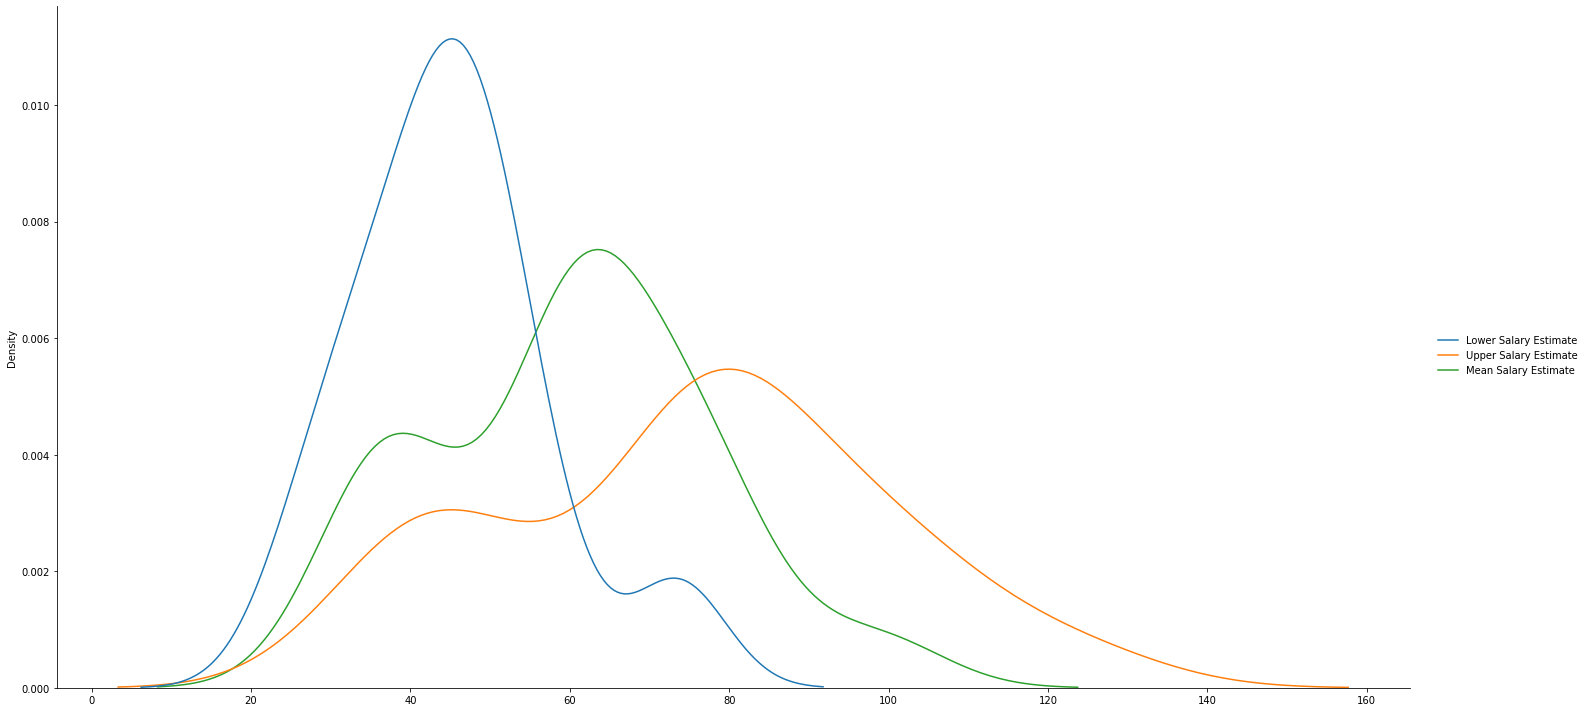

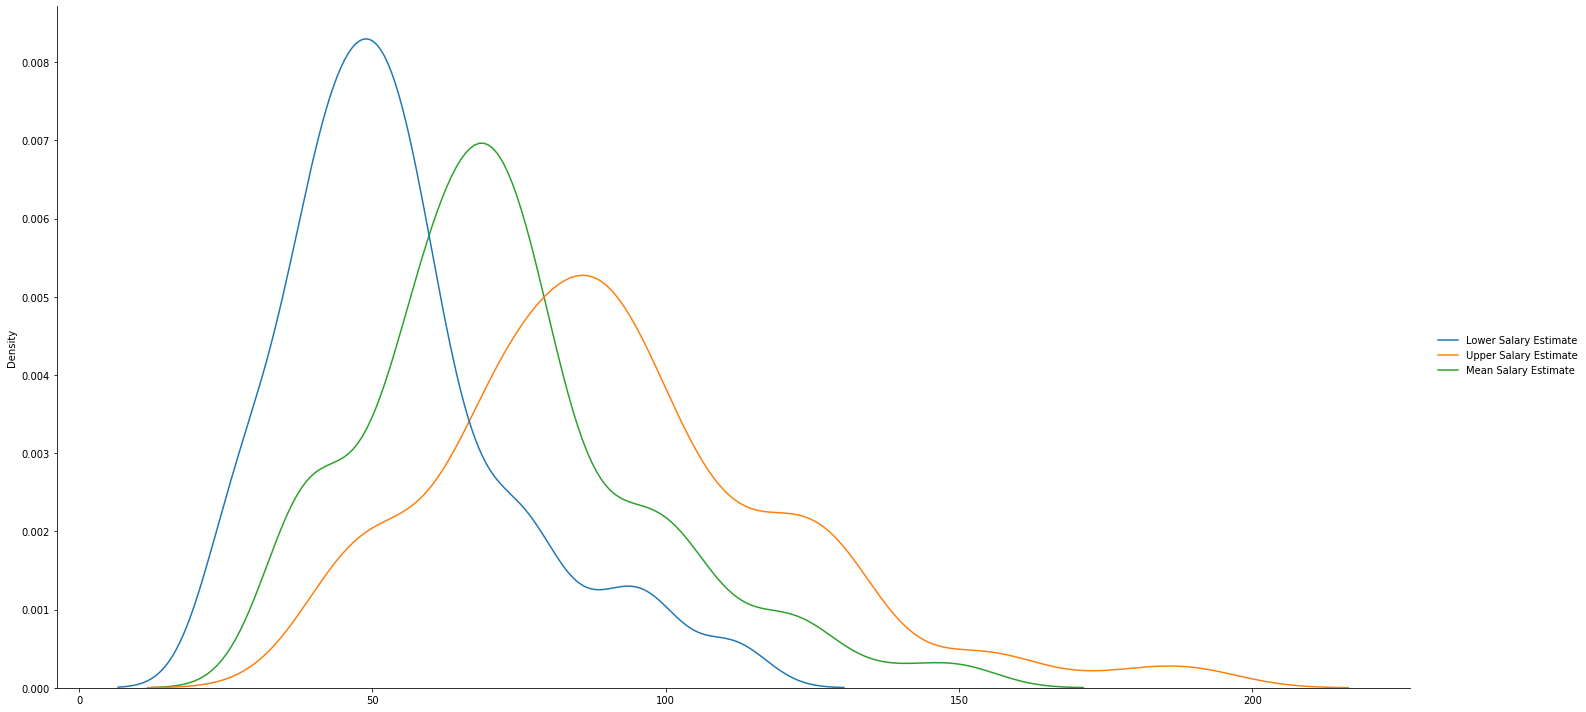

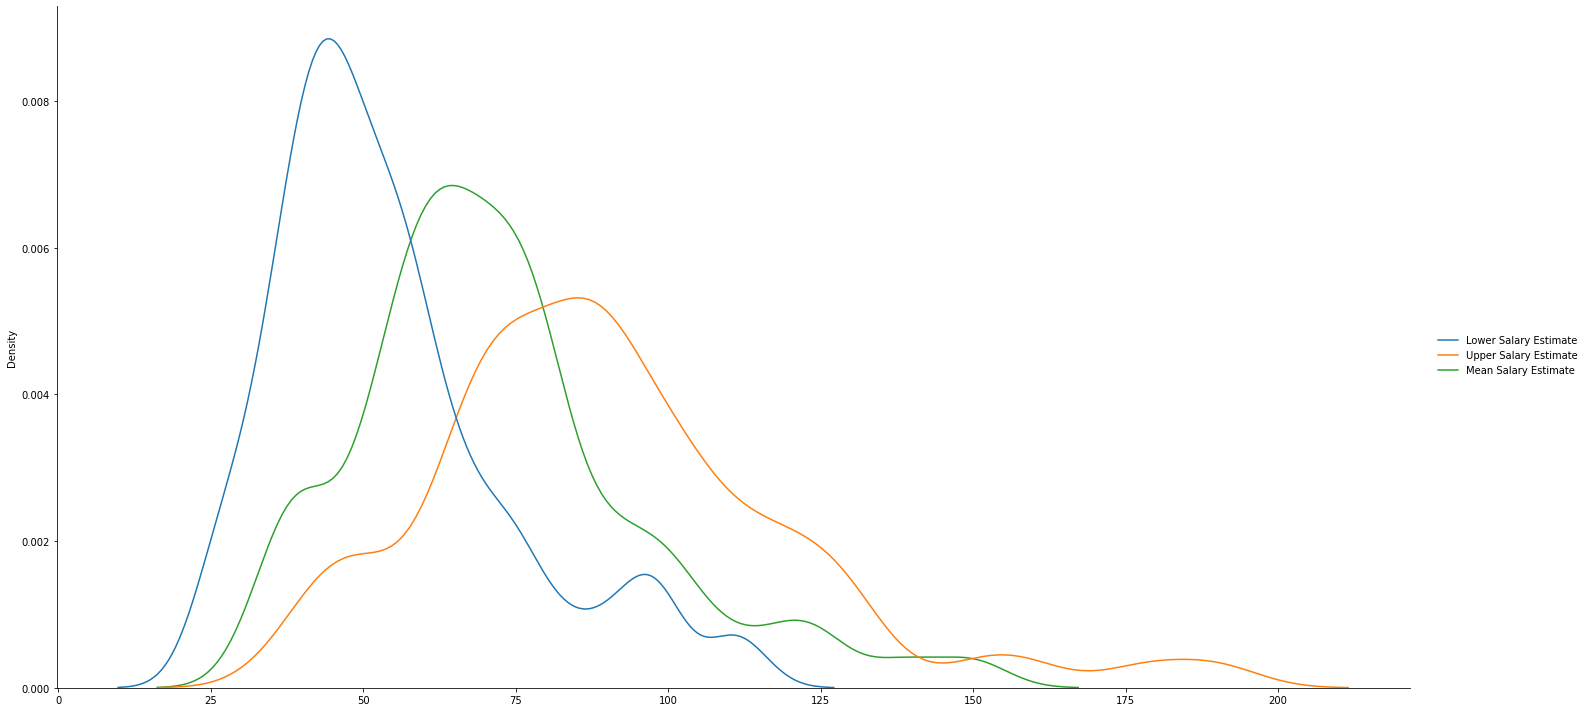

In [150]:
print(df_gpp.groupby('Type of ownership').mean())
sns.displot(data=df_govt,kind='kde',height=10,aspect=2)
sns.displot(data=df_public,kind='kde',height=10,aspect=2)
sns.displot(data=df_private,kind='kde',height=10,aspect=2)

There is not much variations between Public vs Private companies. However, we can see that DA/DS roles in government offices are paid around 12K less than Public/Private companies. There are 3 times more DA/DS roles in Private companies compared to Public compnaies.